In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_objects = pd.read_csv('../data/cb_objects.csv', parse_dates=['founded_at'])
df_ipo = pd.read_csv('../data/cb_ipos.csv')
df_acquisitions = pd.read_csv('../data/cb_acquisitions.csv')

/Users/cosmakufa/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,7,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
keep =[  'parent_id', 
       'normalized_name', 'category_code',  'founded_at',
        'domain', 'twitter_username',
        'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships',
       ]
keeps =[  'parent_id', 
       'normalized_name', 'category_code',  'founded_at',
        'domain', 'twitter_username',
        'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region','status',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships',
       ]
removed = ['id', 'entity_type', 'entity_id', 'name', 'permalink',  'closed_at', 'homepage_url',  'logo_url', 'logo_width', 'logo_height','created_by', 'created_at', 'updated_at']

In [4]:
df_objects.status.value_counts(1)

operating      0.958958
acquired       0.020305
live           0.009400
closed         0.005994
ipo            0.002451
beta           0.001686
development    0.000488
private        0.000473
alpha          0.000244
Name: status, dtype: float64

In [5]:
#df_objects[keeps].head().T

In [6]:
df_objects['year'] = df_objects['founded_at'].apply( lambda x: x.year if x else x)

In [7]:
#grouping.sort_values(ascending=False).head(50)

In [8]:
df_objects['status'] =df_objects['status'].apply( lambda x: 'exit' if (x == 'ipo' or x =='acquired')   else 'operating' if( x != 'closed') else x )

In [13]:
#df_objects = df_objects[(df_objects['status'].isin(['acquired','closed', 'ipo']))]
df_objects.status.value_counts(1)
df_objects2.sort_values('year',ascending=False, inplace=True)

/Users/cosmakufa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df_objects2 = df_objects[df_objects['year'] > 1960]

In [17]:
var = df_objects2.groupby(['year','status']).count()['domain'].unstack()

In [21]:
var = var[['operating', 'exit', 'closed']]

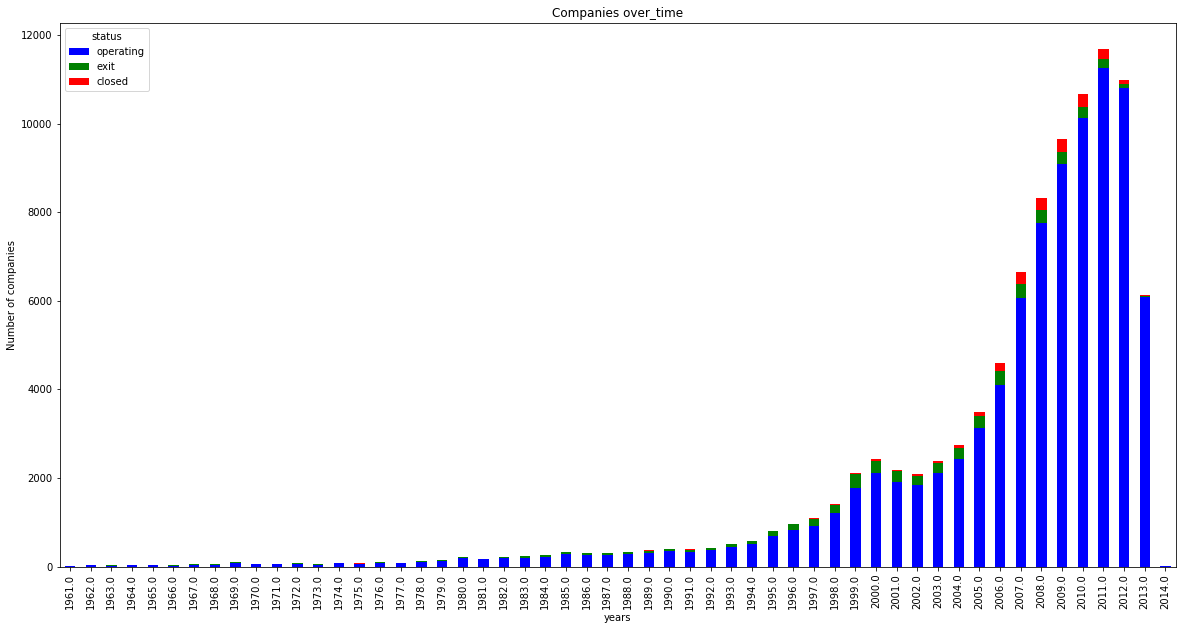

In [26]:
#df_objects2[['year', 'status']].plot(kind="bar", stacked=True,figsize=(20,10));
var.plot(kind='bar',stacked=True,  color=['blue','green','red'], grid=False,figsize=(20,10));
plt.ylabel('Number of companies')
plt.xlabel('years')
plt.title("Companies over_time")
plt.savefig('start_ups');

In [ ]:
#df_objects['year'] = df_objects['year'].apply(lambda x: int(x) if not pd.isna(x) else x, axis =1)

In [ ]:
df_objects2 = df_objects[df_objects['year'] > 1960]
grouping = df_objects2.groupby(['year','status']).count()['domain']
#grouping.sort_values(ascending=False, inplace=True)
grouping.plot(kind="bar", figsize=(20,10));

In [ ]:
df_ipo.head()

In [ ]:
df_acquisitions.head()

In [ ]:
df_joined = df_objects.set_index("id").join(df_ipo.set_index("object_id"), rsuffix="_ipo").join(df_acquisitions.set_index("acquired_object_id"),  rsuffix="_acq")

In [ ]:
df_joined.head().T

In [ ]:
target = df_joined.apply(lambda x: 0 if (pd.isnull(x['id_acq']) and pd.isnull(x['ipo_id']))  else 1, axis =1)

In [ ]:
df_joined.info()

In [ ]:
df_objects[keep].info()

In [ ]:
df_num = df_joined[keep]._get_numeric_data()

In [ ]:
df_num = df_num.fillna(df_num.mean())

In [ ]:
df_num.head().T

In [ ]:
len(target)

In [ ]:
len(df_num)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=5, random_state=0, class_weight='balanced')

In [ ]:
model = clf.fit(df_num.values, target.values)


In [ ]:
list(df_num.columns)

In [ ]:
list(zip(model.feature_importances_, list(df_num.columns)))

In [ ]:
y_hat = model.predict(df_num.values)

In [ ]:
y_hat_p= np.array(list(list(zip(* model.predict_proba(df_num.values)))[0]))

In [ ]:
from sklearn import metrics

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(target, y_hat_p)

In [ ]:
plt.plot(thresholds, fpr);
plt.plot(thresholds, tpr);

In [ ]:
plt.plot(thresholds, tpr);

In [ ]:
plt.plot(tpr,fpr);

In [ ]:
target.value_counts(1)

In [ ]:
pd.DataFrame(y_hat).count()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

In [ ]:
def my_roc_curve(y_true, y_pred):
    xaxis= np.linspace(0, 1, 100)
    result = np.zeros(xaxis.shape)
    
    for i,x in enumerate(xaxis):
        y_pred2 = y_pred.copy()
        y_pred2[(y_pred2 >= x)] = 1
        y_pred2[(y_pred2 < x)] = 0
        result[i] = f1_score(target,y_pred2)
    return (xaxis, result)
my_roc_curve(target, y_hat)
      

In [ ]:
f1_score(target,y_hat)

In [ ]:
recall_score(target,y_hat)

In [ ]:
precision_score(target, y_hat)

In [ ]:
correct = df_joined[ (y_hat == 1) & (target == 1)]

In [ ]:
correct.status.value_counts()

In [ ]:
confusion_matrix(target,y_hat)

In [ ]:
 from sklearn.metrics import f1_score

In [ ]:
def confusion_matrix_percent(target, y_hat):
    vc_Structure = np.array([[-1,0],[0,100]])
    result = confusion_matrix(target,y_hat) / len(target) * 100
    print(result)
    print(result * vc_Structure)
    print(np.sum(result * vc_Structure))
    
confusion_matrix_percent(target,y_hat)

In [ ]:
df_investments['created_at'].sort_values()

the information was collected between May 2007 and and December 2013